## Overview of the Data

In this project based on dataquest.io, we will explore some sqlite functions in order to get familiarized with databases. We will work with data from the [CIA World Factbook](https://www.cia.gov/library/publications/the-world-factbook/) and the data can be downloaded [from thi GitHub repo](https://github.com/factbook/factbook.sql/releases).

Some observations:

- sqlite3 is the library that contains the sqlite functions

- pandas library help us with table manipulation

- conn = sqlite3.connect(database) => sqlite3 creates a connection with the data base

- pandas.read_sql_query(query, connection) returns a table(DataFrame) with the answer of the query

In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")

# With this code, we will discover what tables the database contains
q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn) #this command return a table


,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [2]:
query = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


## Summary Statistics
In this section, we will get some interesting data from the database.

In [3]:
query = 'SELECT MIN(population) AS "minimum population", MAX(population) AS "maximum population", MIN(population_growth) AS "minimum population growth", MAX(population_growth) AS "maximum population growth" FROM facts'
pd.read_sql_query(query, conn)

,minimum population,maximum population,minimum population growth,maximum population growth
0,0,7256490011,0.0,4.02


## Exploring Outliers
In this part, we will find out which countries have the maximum and minimum population.

In [4]:
query = 'SELECT * FROM facts WHERE population == 0'
pd.read_sql_query(query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [5]:
query = 'SELECT * FROM facts WHERE population == (SELECT MAX(population) FROM facts)'
pd.read_sql_query(query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


## Findings
We found that Antartica is the country with the smallest number of habitants and the data about the World is present in the database.

## Histograms
In this section, we will plot on histrograms the data about the countries that does not correspond to the outliers.

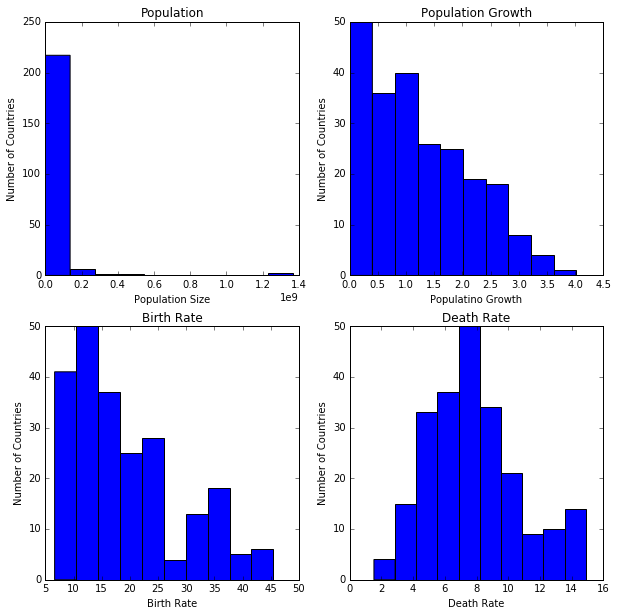

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

#create figure
fig = plt.figure(figsize=(10, 10))

#create axes
ax1 = fig.add_subplot(2,2,1) 
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

query = '''
SELECT population, population_growth, birth_rate, death_rate
FROM facts 
WHERE population != (SELECT MIN(population) FROM facts) and population != (SELECT MAX(population) FROM facts)
'''

T = pd.read_sql_query(query, conn)
T = T.dropna()

ax1.hist(T['population'])
ax1.set_title('Population')
ax1.set_xlabel('Population Size')
ax1.set_ylabel('Number of Countries')

ax2.hist(T['population_growth'])
ax2.set_title('Population Growth')
ax2.set_xlabel('Populatino Growth')
ax2.set_ylabel('Number of Countries')


ax3.hist(T['birth_rate'])
ax3.set_title('Birth Rate')
ax3.set_xlabel('Birth Rate')
ax3.set_ylabel('Number of Countries')

ax4.hist(T['death_rate'])
ax4.set_title('Death Rate')
ax4.set_xlabel('Death Rate')
ax4.set_ylabel('Number of Countries')

plt.show()


## Next Steps
### Which countries have the highest population density?

Population density is the ratio of population to land area

In [7]:
query = '''
SELECT name, CAST(population as Float) / CAST(area_land as Float) as density
FROM facts
ORDER BY density DESC
'''

Table = pd.read_sql_query(query, conn)
Table = Table.dropna()
Table

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


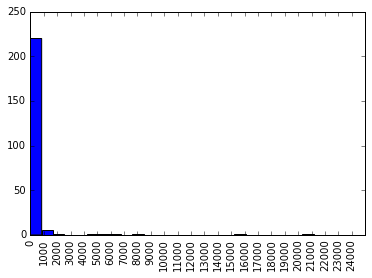

In [8]:
x = []
for i in range(0, 25):
    x.append(i * 1000)
    
plt.hist(Table['density'],bins=25)
plt.xticks(x, rotation=90)
plt.show()


## Findings
By looking at the table, we can see that the countries that have the highest density ara Macau, Monaco and Singapore. The result match with [Wikipedia](https://simple.wikipedia.org/wiki/List_of_countries_by_population_density). Also, it's possible to notice that the majority of the countries have a density less than a thousand.

### Which countries have the highest ratios of water to land?
We will build a table to visualize this.

In [9]:
query = '''
SELECT name, CAST(area_water as Float) / CAST(area_land as Float) as ratio_water_land
FROM facts
ORDER BY ratio_water_land DESC
'''
Table = pd.read_sql_query(query, conn)
Table = Table.dropna()
Table

,name,ratio_water_land
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


### Which countries have more water than land?
We will build a table to answer this question.

In [11]:
query = '''
SELECT name 
FROM facts
WHERE area_water > area_land
'''

Table = pd.read_sql_query(query, conn)
Table

,name
0,British Indian Ocean Territory
1,Virgin Islands
